# LIGHT GBM CLASSIFIER - TEST

In [2]:
import numpy as np
from sklearn import datasets
import lightgbm as lgb
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.metrics import auc

### FUNCTIONS

In [3]:
def plot_roc_curve(true_labels, scores):
    ### actual code for roc + threshold charts start here 
    # compute fpr, tpr, thresholds and roc_auc
    fpr, tpr, thresholds = roc_curve(true_labels, scores)
    roc_auc = auc(fpr, tpr) # compute area under the curve

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])

    plt.show()
    
    pass

In [4]:
def plot_score_dist(y_true, y_score):
    
    df = pd.DataFrame(data=np.column_stack((y_true, y_score)), columns=['target','score'])
    
    plt.figure(figsize=(7, 4))
    ax = sns.boxplot(x="target", y="score", data=df)
    ax.set_title("Score distribution")

    pass

In [5]:
def plot_importance(booster, figsize=(10,5), feature_names=None, **kwargs): 
    
    fig, ax = plt.subplots(1,1,figsize=figsize) 
    
    if feature_names:
        mapper = {'f{0}'.format(i): v for i, v in enumerate(feature_names)}
        mapped = {mapper[k]: v for k, v in booster.get_fscore().items()}
        return xgb.plot_importance(mapped, ax=ax, **kwargs)
    else:
        return xgb.plot_importance(booster=booster, ax=ax, **kwargs)
    pass

### GLOBAL VARIABLES

In [11]:
DATAPATH = 'data/train_test/'
SEED = 47
NITER = 100
CV = 5
SCORE = 'roc_auc'
usenull = True
NJOBS = -1

### LOAD DATA

In [13]:
X_train =  pd.read_pickle(DATAPATH+'X_train.pkl')

In [14]:
X_test =  pd.read_pickle(DATAPATH+'X_test.pkl')

In [15]:
y_train =  pd.read_pickle(DATAPATH+'y_train.pkl')['target']

In [16]:
y_test =  pd.read_pickle(DATAPATH+'y_test.pkl')['target']

In [17]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(data=X_train, label=y_train)

In [18]:
lgb_test = lgb.Dataset(X_test)

### TRAIN MODEL

In [19]:
model_param = np.load('output/models/rseach_gbm_classifier_bestparams_d2019-11-20.npy',allow_pickle=True).tolist()

In [20]:
model_param['num_threads'] = NJOBS

In [24]:
model_param['n_estimators'] = 285

In [25]:
model_param

{'subsample': 0.7,
 'reg_lambda': 0.4,
 'reg_alpha': 0.001,
 'min_data_in_leaf': 140,
 'max_depth': 9,
 'learning_rate': 0.01,
 'gamma': 0.2,
 'colsample_bytree': 0.9,
 'bagging_freq': 10,
 'num_threads': -1,
 'n_estimators': 285}

In [26]:
lgbmodel = lgb.train(model_param, lgb_train)

/opt/anaconda3/envs/xgboostenv/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [27]:
y_pred = lgbmodel.predict(X_test)

### MODEL RESULT

In [28]:
print(SCORE, ' : ', roc_auc_score(y_test,y_pred))

roc_auc  :  0.7904968331733672


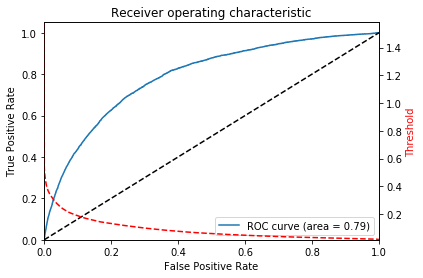

In [29]:
plot_roc_curve(y_test,y_pred)

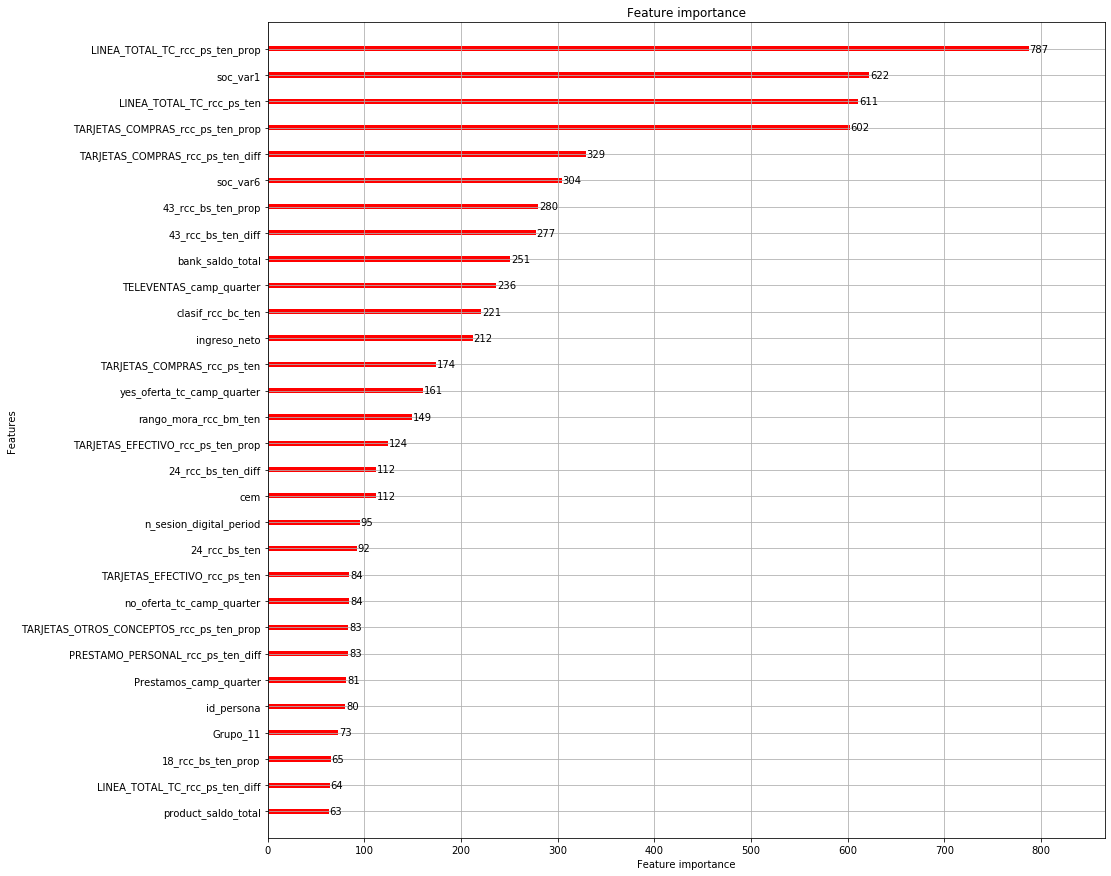

In [30]:
lgb.plot_importance(booster=lgbmodel, figsize=(15,15), max_num_features=30, color='red')
pass

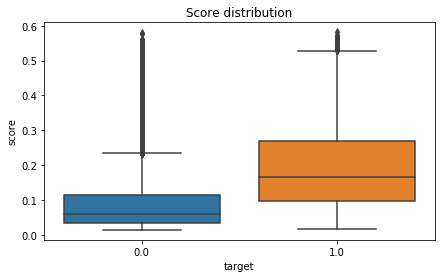

In [31]:
plot_score_dist(y_test, y_pred)